# Black-hole binary formation channels with gaussian mixtures

In [1]:
import numpy as np 
import scipy.stats
import pylab as plt     
import sklearn
from sklearn.mixture import GaussianMixture

plt.style.use('seaborn-v0_8-deep')
plt.rc('text', usetex=True)  
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
random_state = np.random.RandomState(seed=10) #for reproducibility

Shape: (2950, 1)


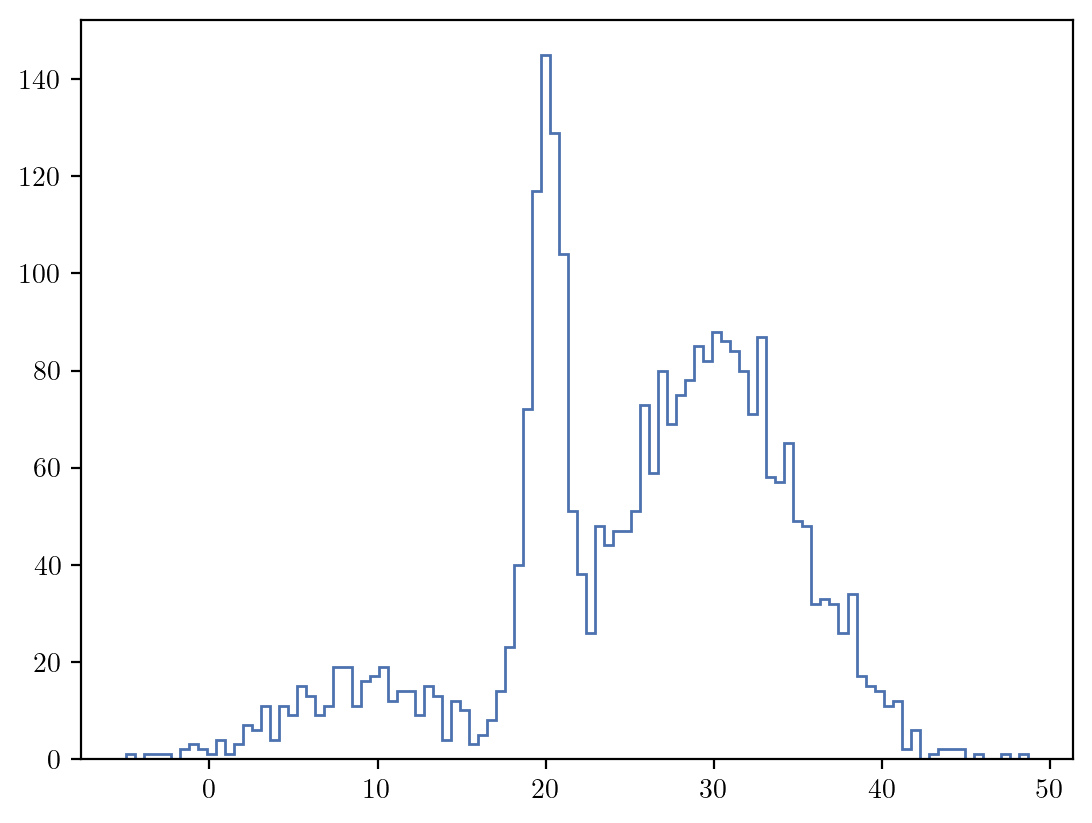

In [3]:
data = np.load('formationchannels.npy')
print('Shape:', (data).shape)
plt.hist(data,bins=100,histtype='step')
plt.show()

I think I see 3 modes. Let's check it

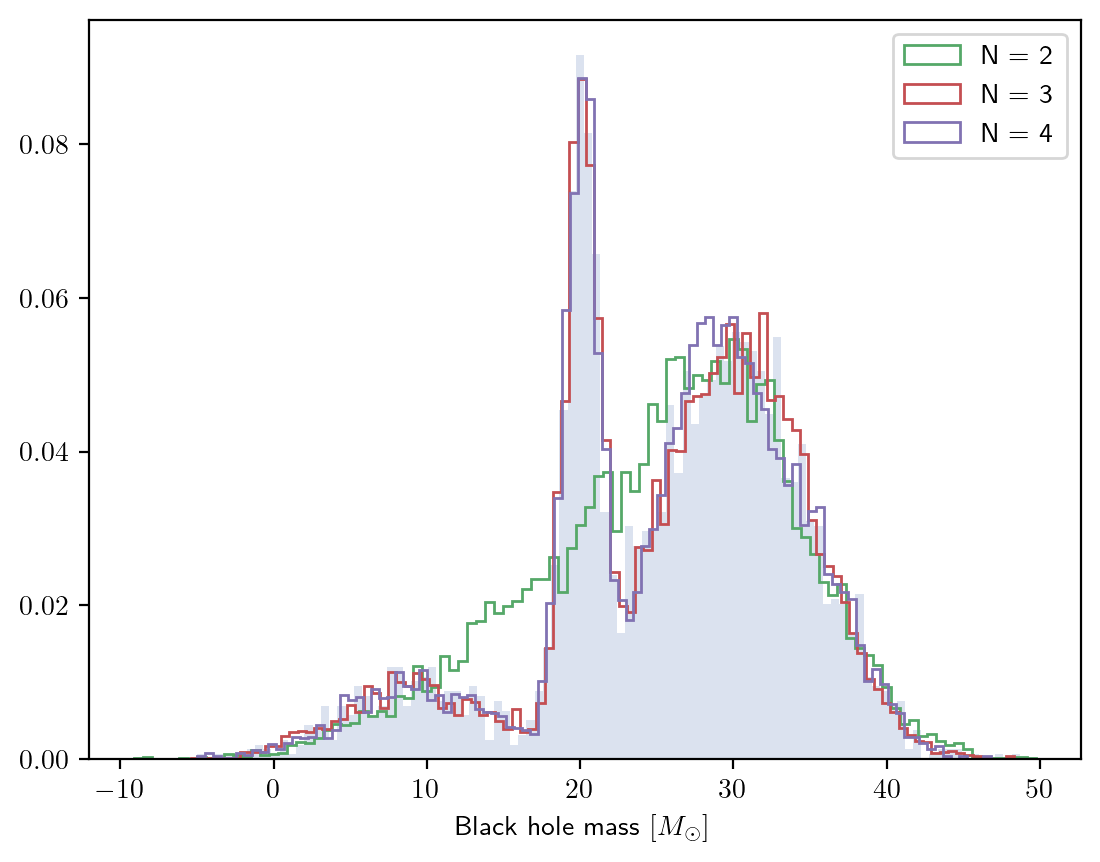

In [4]:
ncomp_arr = np.arange(1,9)
AIC = np.zeros(np.size(ncomp_arr))
BIC = np.zeros(np.size(ncomp_arr))

x0 = np.linspace(0,50,1000)
x = x0[:,np.newaxis]
n_sample = 10000

plt.hist(data, bins=100, density=True, alpha=0.2)

for n in ncomp_arr:
    model = GaussianMixture(n_components=n)
    gm = model.fit(data)
    samples = gm.sample(n_sample)
    AIC[n-1] = gm.aic(data)
    BIC[n-1] = gm.bic(data)
    if np.isin(n, [2, 3, 4]):
        plt.hist(samples[0], bins=100, density=True, histtype='step', label="N = "+str(n))
    
plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.legend()
plt.show()

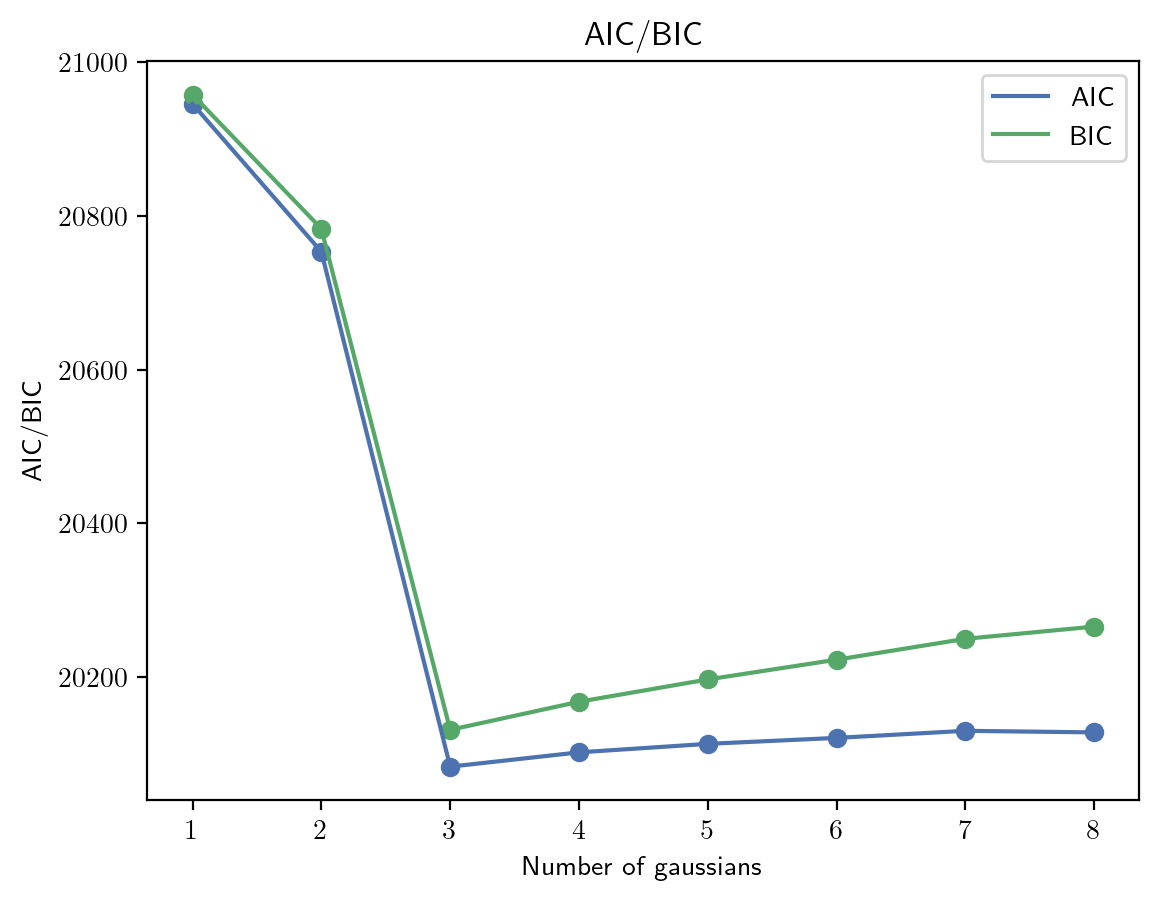

In [5]:
plt.plot(ncomp_arr, AIC, label = 'AIC')
plt.scatter(ncomp_arr, AIC)

plt.plot(ncomp_arr, BIC, label = 'BIC')
plt.scatter(ncomp_arr, BIC)

plt.title('AIC/BIC')
plt.xlabel('Number of gaussians')
plt.ylabel('AIC/BIC')
plt.xticks(range(min(ncomp_arr), max(ncomp_arr) + 1))

plt.legend()
plt.show()

In [6]:
print('AIC:', AIC)
print()
print('Min AIC for: ' + str(np.argmin(AIC)+1) + ' modes')

AIC: [20945.97260859 20753.49600712 20083.0789467  20101.69537048
 20112.76488461 20120.51428032 20129.72497561 20127.67682301]

Min AIC for: 3 modes


In [7]:
print('BIC:', BIC)
print()
print('Min BIC for: ' + str(np.argmin(BIC)+1) + ' modes')

BIC: [20957.95172949 20783.44380936 20130.99543029 20167.58053542
 20196.6187309  20222.33680796 20249.51618459 20265.43671335]

Min BIC for: 3 modes


### 3 gaussian model

In [8]:
ncomponents = 3

model = GaussianMixture(n_components=ncomponents)
gm = model.fit(data)

Compare the data with the gmm pdf.

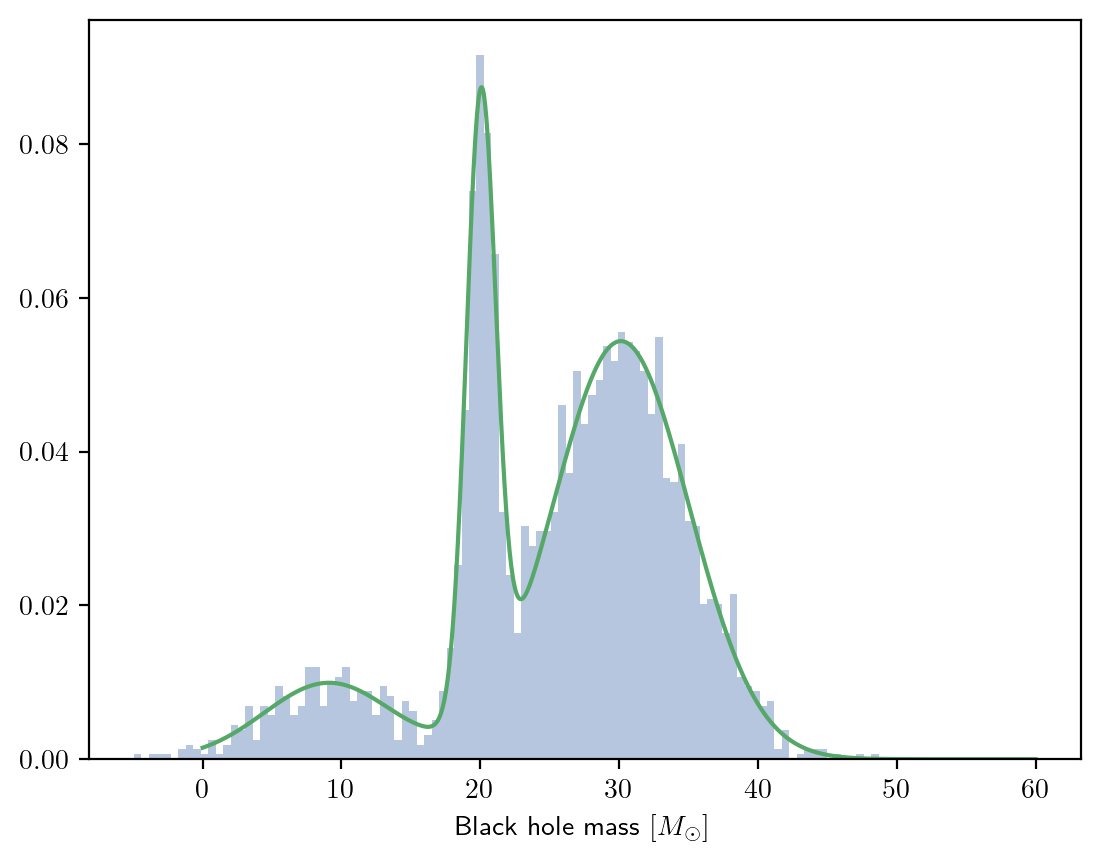

In [9]:
xi = np.linspace(0, 60, 1000)
x = xi[:,np.newaxis]

logprob = model.score_samples(x)
pdf = np.exp(logprob)

plt.hist(data, bins=100, density=True, alpha=0.4, label='Data')

plt.plot(x, pdf)

plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.show()

#### Visualize the three single modes

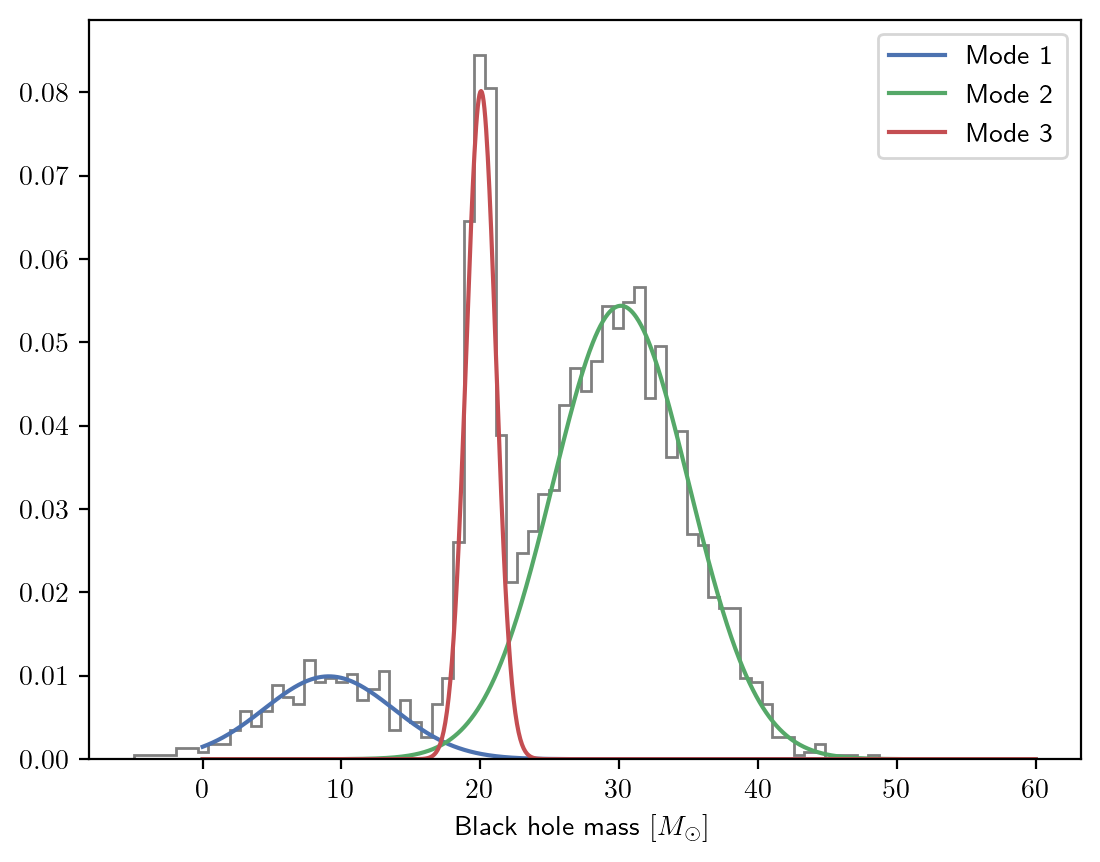

In [10]:
responsibilities = model.predict_proba(x)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(data, 70, density=True, histtype='step', alpha=0.5, color='black')
plt.plot(x, pdf_individual[:,0],label="Mode 1")
plt.plot(x, pdf_individual[:,1],label="Mode 2")
plt.plot(x, pdf_individual[:,2],label="Mode 3")

plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.legend()
plt.show()

Let's take a look at the responsibilities

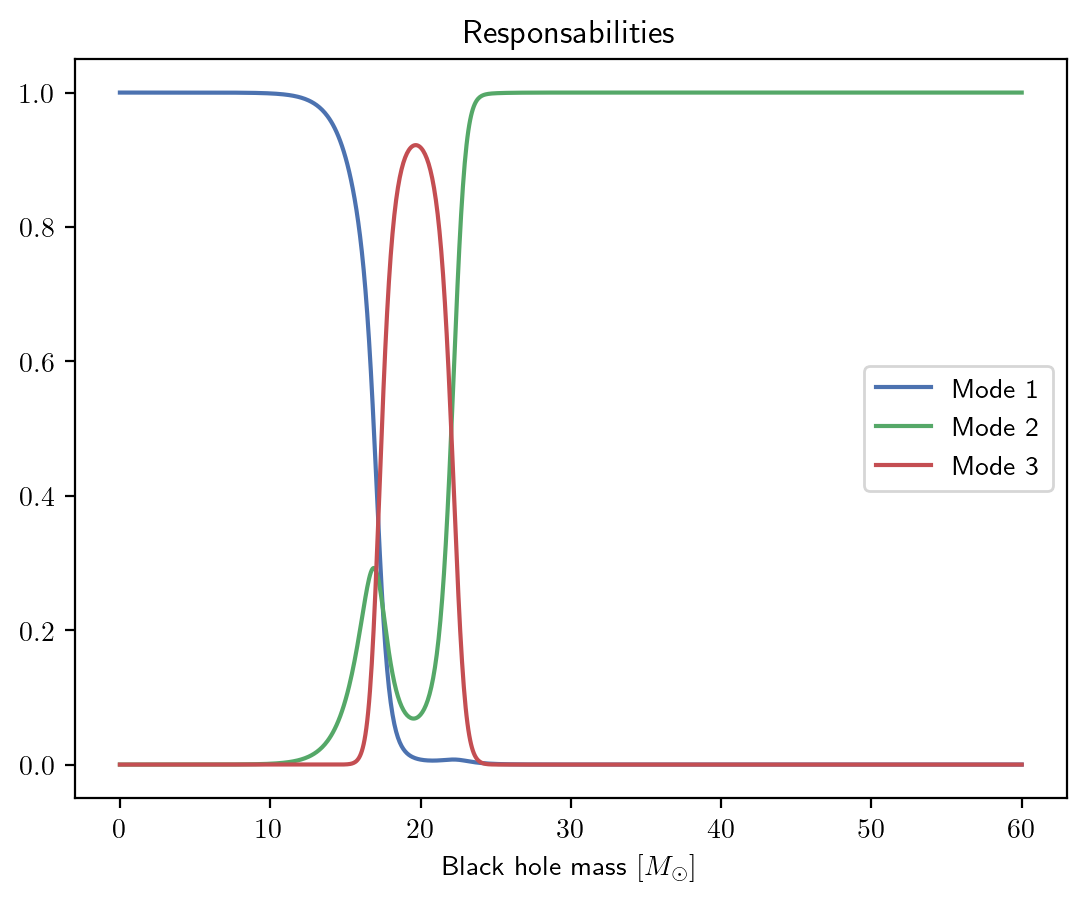

In [11]:
plt.plot(xi,responsibilities[:,0],label="Mode 1")
plt.plot(xi,responsibilities[:,1],label="Mode 2")
plt.plot(xi,responsibilities[:,2],label="Mode 3")

plt.title('Responsabilities')
plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.legend()
plt.show()